Multi-channel CSC
=================

This example demonstrates solving a convolutional sparse coding problem with a greyscale dictionary and a colour signal [[51]](http://sporco.rtfd.org/en/latest/zreferences.html#wohlberg-2016-convolutional)

  $$\mathrm{argmin}_\mathbf{x} \; (1/2) \sum_c \left\| \sum_m \mathbf{d}_m * \mathbf{x}_{c,m} - \mathbf{s}_c \right\|_2^2 + \lambda \sum_c \sum_m \| \mathbf{x}_{c,m} \|_1 \;,$$

where $\mathbf{d}_{m}$ is the $m^{\text{th}}$ dictionary filter, $\mathbf{x}_{c,m}$ is the coefficient map corresponding to the $m^{\text{th}}$ dictionary filter and channel $c$ of the input image, and $\mathbf{s}_c$ is channel $c$ of the input image.

In [1]:
from __future__ import print_function
from builtins import input

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco import util
from sporco import signal
from sporco import plot
plot.config_notebook_plotting()
from sporco.metric import psnr
from sporco.admm import cbpdn

Load example image.

In [2]:
img = util.ExampleImages().image('kodim23.png', scaled=True,
                                 idxexp=np.s_[160:416,60:316])

Highpass filter example image.

In [3]:
npd = 16
fltlmbd = 10
sl, sh = signal.tikhonov_filter(img, fltlmbd, npd)

Load greyscale dictionary and display it.

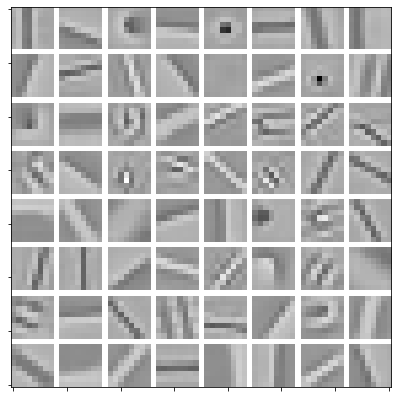

In [4]:
D = util.convdicts()['G:8x8x64']
plot.imview(util.tiledict(D), fgsz=(7, 7))

Set [admm.cbpdn.ConvBPDN](http://sporco.rtfd.org/en/latest/modules/sporco.admm.cbpdn.html#sporco.admm.cbpdn.ConvBPDN) solver options.

In [5]:
lmbda = 1e-1
opt = cbpdn.ConvBPDN.Options({'Verbose': True, 'MaxMainIter': 200,
                              'RelStopTol': 5e-3, 'AuxVarObj': False})

Initialise and run CSC solver.

In [6]:
b = cbpdn.ConvBPDN(D, sh, lmbda, opt, dimK=0)
X = b.solve()
print("ConvBPDN solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     r         s         ρ       
----------------------------------------------------------------


   0  4.97e+02  3.05e+00  4.94e+03  9.92e-01  3.61e-02  6.00e+00


   1  4.24e+02  1.66e+01  4.07e+03  8.93e-01  1.64e-01  6.00e+00


   2  3.46e+02  3.16e+01  3.14e+03  4.46e-01  2.84e-01  9.90e+00


   3  3.43e+02  3.79e+01  3.05e+03  2.78e-01  2.38e-01  8.77e+00


   4  3.42e+02  3.67e+01  3.05e+03  2.38e-01  1.49e-01  6.69e+00


   5  3.03e+02  3.63e+01  2.66e+03  2.08e-01  1.17e-01  5.98e+00


   6  2.71e+02  3.76e+01  2.33e+03  1.77e-01  8.89e-02  5.98e+00


   7  2.49e+02  3.96e+01  2.09e+03  1.46e-01  6.93e-02  5.98e+00


   8  2.36e+02  4.15e+01  1.94e+03  1.16e-01  6.00e-02  5.98e+00


   9  2.30e+02  4.26e+01  1.87e+03  9.43e-02  5.32e-02  5.98e+00


  10  2.25e+02  4.32e+01  1.82e+03  7.92e-02  4.63e-02  5.98e+00


  11  2.19e+02  4.33e+01  1.75e+03  6.82e-02  4.14e-02  5.98e+00


  12  2.11e+02  4.35e+01  1.68e+03  6.28e-02  3.78e-02  5.43e+00


  13  2.06e+02  4.37e+01  1.62e+03  5.88e-02  3.31e-02  4.95e+00


  14  2.02e+02  4.41e+01  1.57e+03  5.24e-02  2.88e-02  4.95e+00


  15  1.97e+02  4.45e+01  1.53e+03  4.64e-02  2.61e-02  4.95e+00


  16  1.93e+02  4.48e+01  1.48e+03  4.10e-02  2.46e-02  4.95e+00


  17  1.91e+02  4.50e+01  1.46e+03  3.68e-02  2.29e-02  4.95e+00


  18  1.89e+02  4.51e+01  1.44e+03  3.54e-02  2.09e-02  4.43e+00


  19  1.88e+02  4.52e+01  1.43e+03  3.25e-02  1.90e-02  4.43e+00


  20  1.85e+02  4.52e+01  1.40e+03  2.98e-02  1.77e-02  4.43e+00


  21  1.83e+02  4.53e+01  1.37e+03  2.74e-02  1.67e-02  4.43e+00


  22  1.80e+02  4.54e+01  1.35e+03  2.67e-02  1.56e-02  4.02e+00


  23  1.79e+02  4.55e+01  1.33e+03  2.49e-02  1.43e-02  4.02e+00


  24  1.77e+02  4.57e+01  1.32e+03  2.32e-02  1.32e-02  4.02e+00


  25  1.76e+02  4.58e+01  1.30e+03  2.16e-02  1.24e-02  4.02e+00


  26  1.75e+02  4.59e+01  1.29e+03  2.02e-02  1.18e-02  4.02e+00


  27  1.73e+02  4.59e+01  1.27e+03  1.89e-02  1.12e-02  4.02e+00


  28  1.72e+02  4.60e+01  1.26e+03  1.78e-02  1.07e-02  4.02e+00


  29  1.71e+02  4.60e+01  1.25e+03  1.75e-02  1.01e-02  3.67e+00


  30  1.70e+02  4.61e+01  1.24e+03  1.66e-02  9.60e-03  3.67e+00


  31  1.69e+02  4.62e+01  1.23e+03  1.58e-02  9.06e-03  3.67e+00


  32  1.68e+02  4.62e+01  1.22e+03  1.50e-02  8.58e-03  3.67e+00


  33  1.67e+02  4.63e+01  1.21e+03  1.43e-02  8.17e-03  3.67e+00


  34  1.66e+02  4.64e+01  1.20e+03  1.35e-02  7.80e-03  3.67e+00


  35  1.66e+02  4.64e+01  1.19e+03  1.29e-02  7.44e-03  3.67e+00


  36  1.65e+02  4.65e+01  1.18e+03  1.23e-02  7.10e-03  3.67e+00


  37  1.64e+02  4.65e+01  1.18e+03  1.17e-02  6.78e-03  3.67e+00


  38  1.64e+02  4.66e+01  1.17e+03  1.11e-02  6.53e-03  3.67e+00


  39  1.63e+02  4.66e+01  1.16e+03  1.06e-02  6.30e-03  3.67e+00


  40  1.62e+02  4.66e+01  1.16e+03  1.02e-02  6.06e-03  3.67e+00


  41  1.62e+02  4.67e+01  1.15e+03  9.73e-03  5.78e-03  3.67e+00


  42  1.61e+02  4.67e+01  1.14e+03  9.33e-03  5.53e-03  3.67e+00


  43  1.60e+02  4.68e+01  1.14e+03  8.93e-03  5.30e-03  3.67e+00


  44  1.60e+02  4.68e+01  1.13e+03  8.55e-03  5.11e-03  3.67e+00


  45  1.59e+02  4.68e+01  1.12e+03  8.19e-03  4.94e-03  3.67e+00


  46  1.59e+02  4.69e+01  1.12e+03  8.24e-03  4.76e-03  3.34e+00


  47  1.59e+02  4.69e+01  1.12e+03  7.96e-03  4.55e-03  3.34e+00


  48  1.58e+02  4.69e+01  1.11e+03  7.68e-03  4.35e-03  3.34e+00


  49  1.58e+02  4.70e+01  1.11e+03  7.40e-03  4.18e-03  3.34e+00


  50  1.58e+02  4.70e+01  1.11e+03  7.12e-03  4.03e-03  3.34e+00


  51  1.57e+02  4.70e+01  1.10e+03  6.85e-03  3.89e-03  3.34e+00


  52  1.57e+02  4.70e+01  1.10e+03  6.60e-03  3.75e-03  3.34e+00


  53  1.57e+02  4.70e+01  1.10e+03  6.36e-03  3.61e-03  3.34e+00


  54  1.56e+02  4.71e+01  1.09e+03  6.13e-03  3.48e-03  3.34e+00


  55  1.56e+02  4.71e+01  1.09e+03  5.91e-03  3.36e-03  3.34e+00


  56  1.56e+02  4.71e+01  1.08e+03  5.70e-03  3.25e-03  3.34e+00


  57  1.55e+02  4.71e+01  1.08e+03  5.49e-03  3.15e-03  3.34e+00


  58  1.55e+02  4.72e+01  1.08e+03  5.29e-03  3.05e-03  3.34e+00


  59  1.55e+02  4.72e+01  1.07e+03  5.12e-03  2.96e-03  3.34e+00


  60  1.54e+02  4.72e+01  1.07e+03  4.94e-03  2.86e-03  3.34e+00
----------------------------------------------------------------
ConvBPDN solve time: 39.69s


Reconstruct image from sparse representation.

In [7]:
shr = b.reconstruct().squeeze()
imgr = sl + shr
print("Reconstruction PSNR: %.2fdB\n" % psnr(img, imgr))

Reconstruction PSNR: 33.13dB



Display low pass component and sum of absolute values of coefficient maps of highpass component.

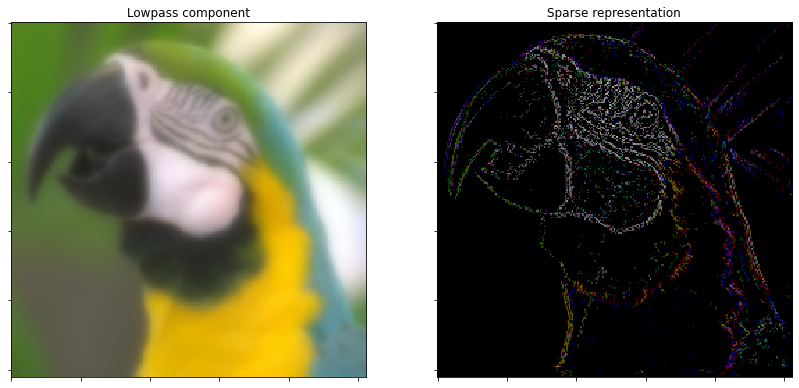

In [8]:
gamma = lambda x, g: x**g
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(sl, title='Lowpass component', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(gamma(np.sum(abs(X), axis=b.cri.axisM).squeeze(), 0.4),
            title='Sparse representation', fig=fig)
fig.show()

Display original and reconstructed images.

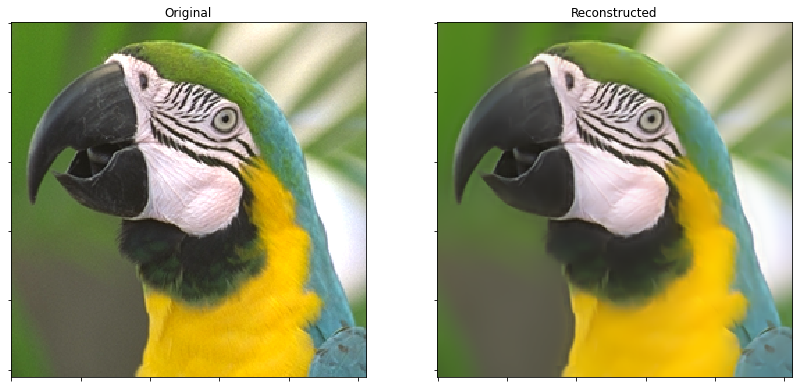

In [9]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(img, title='Original', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(imgr, title='Reconstructed', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

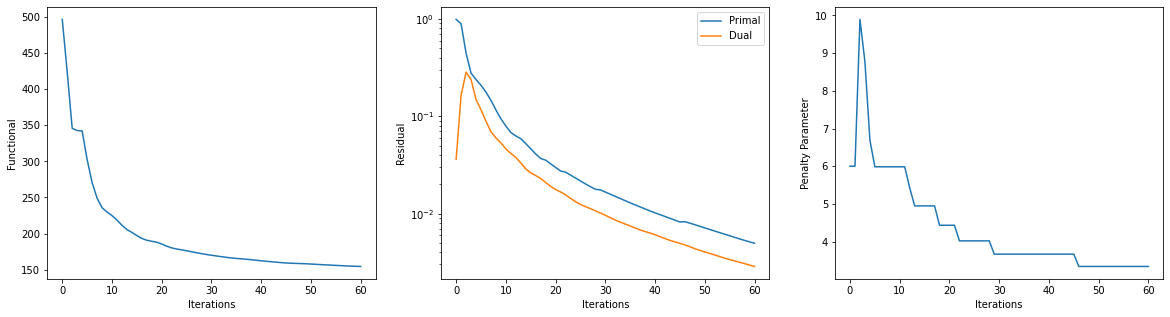

In [10]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()